In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, make_scorer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [1]:
TDC = pd.read_csv('./JustTaxiAnalytics.csv')

NameError: name 'pd' is not defined

In [3]:
TDC.head(10)

booking_id  accuracy     bearing  acceleration_x  acceleration_y  \
0   309237645396     3.900  298.000000       -0.373673        9.287003   
1   635655159839    10.000  105.063110        0.095554       -7.256091   
2    68719476855     3.900  160.000000        0.493000        9.450000   
3   214748364930     3.000  226.000000        0.424061        9.005522   
4     8589934651     3.900  177.000000        0.471390        9.011368   
5  1168231104535    32.000  117.145905       -1.218420       -9.336139   
6  1348619730957     5.000  273.033050       -0.319110       -9.194529   
7  1116691497111     4.000  111.000000       -0.495615        8.408693   
8     8589934706     3.972  259.000000       -0.548035        7.992035   
9   283467841694     9.000   47.248993       -0.250623       -9.817795   

   acceleration_z    gyro_x    gyro_y    gyro_z  second  ...  acceleration  \
0        3.450790  0.019684 -0.008652 -0.000122     4.0  ...      4.115000   
1       -5.868097 -0.041447 -0.126973 -0.034965   642.0  ...      0.027399   
2        0.375000 -0.031586 -0.482635  0.075562   224.0  ...      0.108930   
3       -3.281991  0.039916  0.004747  0.018937  1008.0  ...      0.000000   
4        2.549545 -0.011719 -0.116433  0.024612  1035.0  ...      0.019140   
5       -1.249374 -0.082649 -0.237613 -0.062716   599.0  ...      0.016190   
6       -0.927722  0.054250 -0.003099  0.012686   190.0  ...      0.018502   
7        4.812492  0.009930 -0.053581  0.003511  1284.0  ...      0.020764   
8        7.287231  0.271179  0.309525  0.028885   330.0  ...      0.004727   
9       -1.419397  0.036415 -0.017237 -0.030254   651.0  ...      0.000035   

   driver_id  label     name  date_of_birth  gender   car_model  \
0         58      0    Robbi     1977-10-29    Male        Ford   
1        140      0   Murvyn     1987-05-13    Male      Toyota   
2        130      0    Taryn     1980-04-25    Male      Nissan   
3         80      0   Gerald     1976-01-11    Male  Volkswagen   
4        147      0   Delila     1982-11-08  Female      Toyota   
5         65      0  Tabatha     1976-08-10    Male      Nissan   
6         69      0    Ozzie     1984-09-30    Male     Hyundai   
7        118      0     Rana     1973-09-06    Male      Nissan   
8        133      0    Sonia     1978-05-01  Female  Volkswagen   
9          6      1    Tyrus     1983-10-20    Male        Ford   

   car_make_year  rating age  
0           2011     3.5  45  
1           2011     4.0  35  
2           2011     4.5  42  
3           2005     4.5  46  
4           2011     3.0  40  
5           2011     3.5  46  
6           2009     4.5  38  
7           2010     4.5  49  
8           2011     4.5  44  
9           2013     4.5  39  

[10 rows x 26 columns]

In [4]:
TDC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7467388 entries, 0 to 7467387
Data columns (total 26 columns):
 #   Column          Dtype  
---  ------          -----  
 0   booking_id      int64  
 1   accuracy        float64
 2   bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  speed           float64
 11  speed (km/h)    float64
 12  yaw             float64
 13  pitch           float64
 14  roll            float64
 15  turning_force   float64
 16  acceleration    float64
 17  driver_id       int64  
 18  label           int64  
 19  name            object 
 20  date_of_birth   object 
 21  gender          object 
 22  car_model       object 
 23  car_make_year   int64  
 24  rating          float64
 25  age             int64  
dtypes: float64(17), int64(5), object(4)
memory usage: 1.4+ GB


## EDA & Feature Importance

### Correlation Matrix

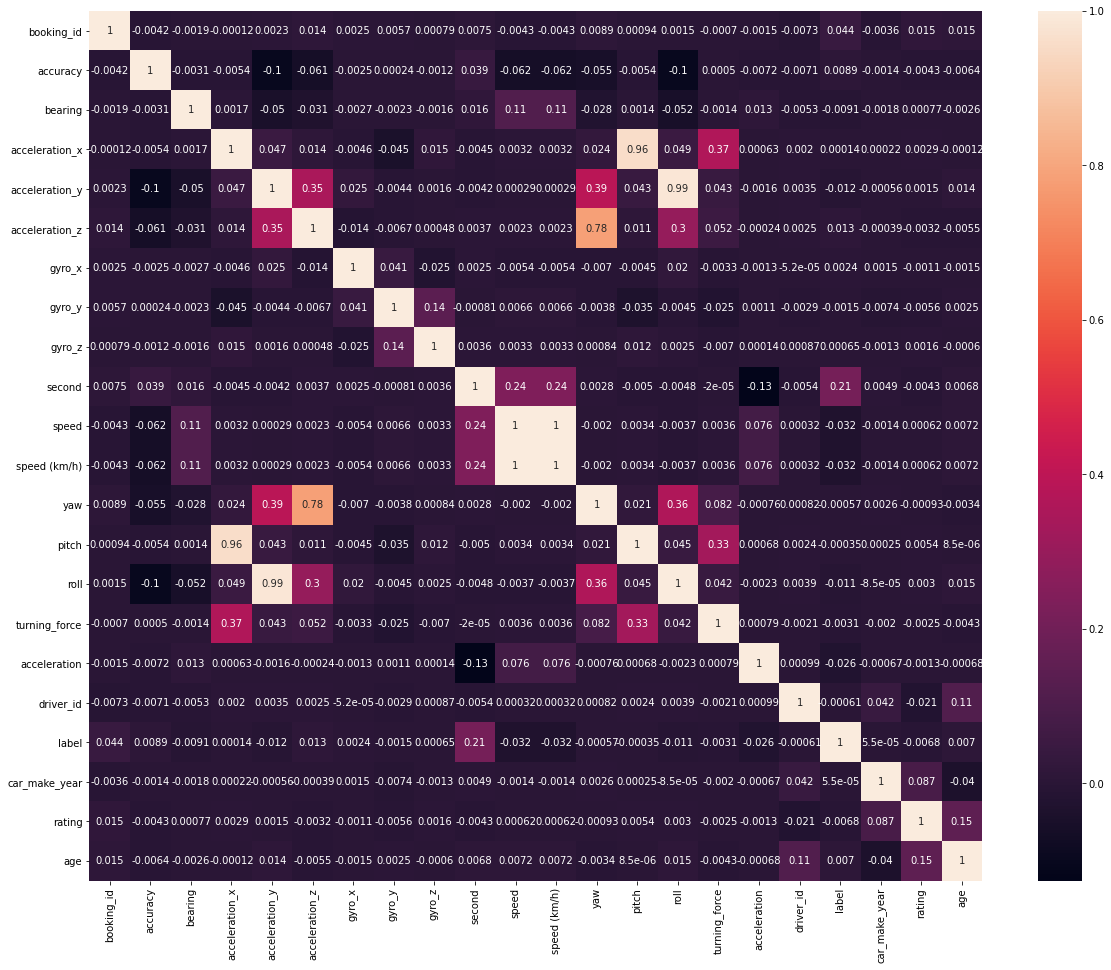

In [5]:
corrMatrix = TDC.corr()
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Pairplot

In [6]:
readings_cols = TDC.columns.difference(["booking_id", "second"])

<Figure size 1440x1440 with 0 Axes>

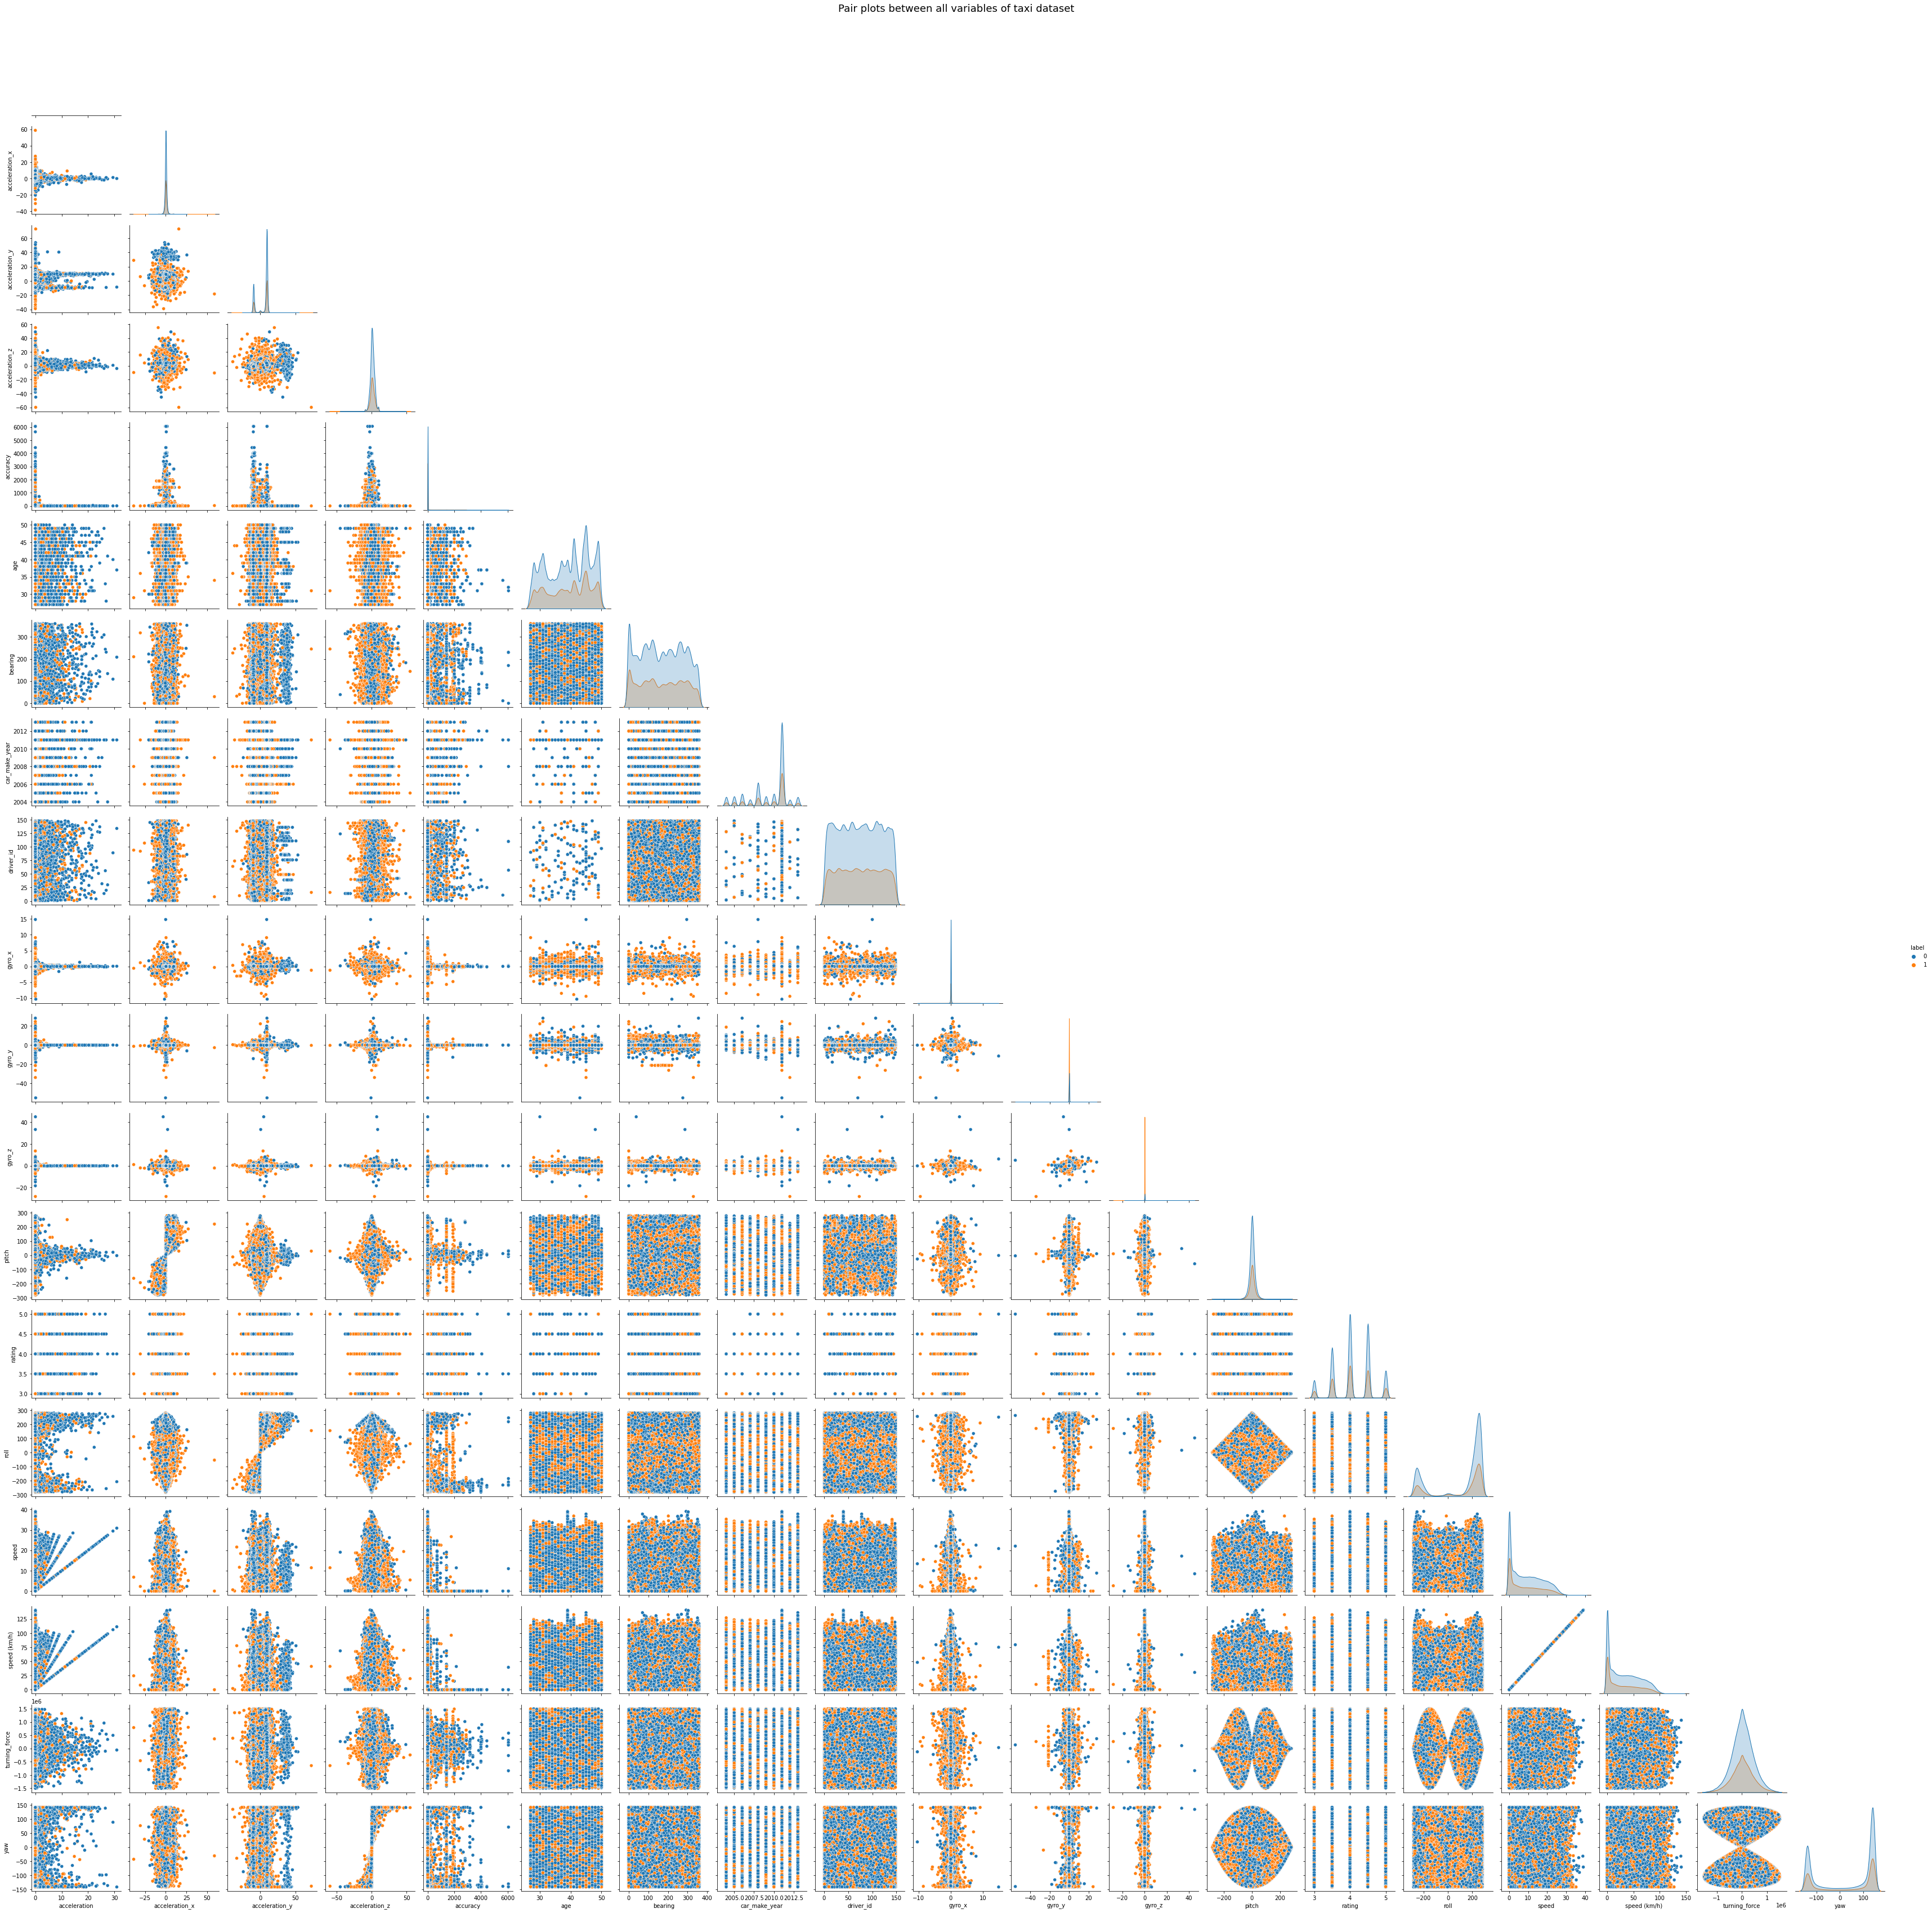

In [8]:
fig = plt.figure(figsize=(20,20))
g = sns.pairplot(
    TDC.sample(700000).loc[:, readings_cols],
    corner=True,
    diag_kind="kde",
    hue="label"
)
g.fig.suptitle("Pair plots between all variables of taxi dataset", y=1.001, fontsize=18)
plt.show()


## Feature Enineering

### Calculating G-Force

In [5]:
TDC['G-Force'] = TDC.apply(lambda row: row['acceleration'] / 9.8, axis=1)

In [6]:
TDC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7467388 entries, 0 to 7467387
Data columns (total 27 columns):
 #   Column          Dtype  
---  ------          -----  
 0   booking_id      int64  
 1   accuracy        float64
 2   bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  speed           float64
 11  speed (km/h)    float64
 12  yaw             float64
 13  pitch           float64
 14  roll            float64
 15  turning_force   float64
 16  acceleration    float64
 17  driver_id       int64  
 18  label           int64  
 19  name            object 
 20  date_of_birth   object 
 21  gender          object 
 22  car_model       object 
 23  car_make_year   int64  
 24  rating          float64
 25  age             int64  
 26  G-Force         float64
dtypes: float64(18), int64(5), object(4)
memor

In [7]:
TDC['G-Force']

0          0.419898
1          0.002796
2          0.011115
3          0.000000
4          0.001953
             ...   
7467383    0.010392
7467384    0.001291
7467385    0.001495
7467386    0.000391
7467387    0.009282
Name: G-Force, Length: 7467388, dtype: float64

In [8]:
TDC = TDC.drop(TDC[TDC['G-Force'] > 3].index)

In [9]:
TDC['G-Force']

0          0.419898
1          0.002796
2          0.011115
3          0.000000
4          0.001953
             ...   
7467383    0.010392
7467384    0.001291
7467385    0.001495
7467386    0.000391
7467387    0.009282
Name: G-Force, Length: 7460619, dtype: float64

## Feature Selection

In [10]:
TDC.shape

(7460619, 27)

In [11]:
TDC = TDC.drop(['accuracy', 'bearing', 'speed','date_of_birth','gender','car_model','car_make_year','age','name','rating','driver_id','G-Force'], axis=1)
TDC.head()

booking_id  acceleration_x  acceleration_y  acceleration_z    gyro_x  \
0  309237645396       -0.373673        9.287003        3.450790  0.019684   
1  635655159839        0.095554       -7.256091       -5.868097 -0.041447   
2   68719476855        0.493000        9.450000        0.375000 -0.031586   
3  214748364930        0.424061        9.005522       -3.281991  0.039916   
4    8589934651        0.471390        9.011368        2.549545 -0.011719   

     gyro_y    gyro_z  second  speed (km/h)        yaw     pitch       roll  \
0 -0.008652 -0.000122     4.0     59.255997  140.84708 -6.785761  218.36288   
1 -0.126973 -0.034965   642.0     63.323997 -141.35974  1.843027 -160.32603   
2 -0.482635  0.075562   224.0     87.841470   97.98992  9.374606  270.96182   
3  0.004747  0.018937  1008.0      0.000000 -140.62660  7.958456  219.35558   
4 -0.116433  0.024612  1035.0     71.315994  139.85912  9.052619  232.31567   

   turning_force  acceleration  label  
0    -208701.330      4.115000      0  
1      41769.707      0.027399      0  
2     248910.120      0.108930      0  
3    -245496.300      0.000000      0  
4     294132.840      0.019140      0

In [12]:
TDC.shape

(7460619, 15)

### Data Aggregation

In [13]:
# custom function for measure of dispersion
def standard_deviation():
    def standard_deviation_(x):
        return np.std(x, ddof=0)
    standard_deviation_.__name__ = 'std'
    return standard_deviation_

def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

# aggregate by bookingid
TDCAG = pd.DataFrame()
for col in tqdm(TDC.columns):
    if col != "booking_id" and col != "label":
        temp = TDC.groupby("booking_id")[col].agg(
            ["mean", 'max', 'min', standard_deviation(), percentile(25)])
        TDCAG[col + "_mean"] = temp["mean"]
        TDCAG[col + "_max"] = temp["max"]
        TDCAG[col + "_min"] = temp["min"]
        TDCAG[col+ "_std"] = temp['std']
        TDCAG[col+ "_25%"] = temp['25%']
    elif col == "label":
        temp = TDC.groupby("booking_id")[col].agg(["max"])
        TDCAG[col] = temp['max']

# display dataframe
TDCAG.reset_index(inplace=True)
display(TDCAG)

# display dataframe shape
print("Before Aggregation: {}".format(TDC.shape))
print("After Aggregation: {}".format(TDCAG.shape))


  0%|          | 0/15 [00:00<?, ?it/s]

booking_id  acceleration_x_mean  acceleration_x_max  \
0                  0            -0.695480            4.782614   
1                  1            -0.495516            3.387767   
2                  2             0.273682            1.956122   
3                  4            -0.360124            4.517638   
4                  6             0.550104            4.654470   
...              ...                  ...                 ...   
19985  1709396983957             0.101438           11.296188   
19986  1709396983960             0.556347            3.709992   
19987  1709396983966            -0.209172            2.232147   
19988  1709396983971             0.729276            4.637710   
19989  1709396983975            -0.283590            1.481604   

       acceleration_x_min  acceleration_x_std  acceleration_y_mean  \
0               -4.692294            0.931499            -9.412594   
1               -5.352994            0.801738             9.511599   
2               -1.565856            0.764038             9.641519   
3               -2.866458            0.613654            -9.222140   
4               -2.013585            0.784925             9.407493   
...                   ...                 ...                  ...   
19985          -15.993755            2.435038             1.958374   
19986           -3.379367            0.783220            -8.350264   
19987           -2.704697            0.760588             9.043601   
19988           -3.550709            1.027490             8.832830   
19989           -2.864813            0.525486            -8.517543   

       acceleration_y_max  acceleration_y_min  acceleration_y_std  \
0                9.963742          -12.190784            1.843825   
1               11.435962           -0.050786            0.710092   
2               11.248303           -0.918849            1.241399   
3               10.763396          -12.916333            1.794614   
4               13.249917           -8.235179            1.392413   
...                   ...                 ...                 ...   
19985           39.845520          -34.944440            5.056347   
19986            9.917377          -11.460449            2.409434   
19987           11.092163            0.123482            0.634502   
19988           11.430268           -1.843233            1.030735   
19989            9.409185          -10.789182            2.576380   

       acceleration_z_mean  ...   roll_std  turning_force_mean  \
0                -1.502891  ...  47.916011      -248829.625010   
1                -2.171415  ...  19.851665       285205.060068   
2                 0.069412  ...  41.745082       101651.138084   
3                -2.612529  ...  43.179891      -194387.143445   
4                 2.290829  ...  36.655893       269459.647881   
...                    ...  ...        ...                 ...   
19985             9.671492  ...  74.796327         2729.767675   
19986            -4.401021  ...  53.635600       259028.779201   
19987             3.313790  ...  17.791743      -107789.585735   
19988             3.747074  ...  24.692618       362824.701905   
19989            -3.950185  ...  61.228197      -136222.784491   

       turning_force_max  turning_force_min  turning_force_std  \
0             1120258.20         -1236779.5      425243.970106   
1             1273353.10         -1161197.1      344555.457697   
2             1374232.50          -829088.4      348493.922292   
3             1375305.50         -1277482.1      303380.890713   
4             1427426.40          -973504.2      359611.049924   
...                  ...                ...                ...   
19985         1470940.50         -1442132.5      381178.343772   
19986         1317781.60         -1297546.1      363757.584356   
19987         1034394.06         -1176833.2      390942.540930   
19988         1414127.00         -1137599.4      495246.454901   
19989          804934.25         -117624

Before Aggregation: (7460619, 15)
After Aggregation: (19990, 54)


In [14]:
TDCAG.to_csv("TaxiDatasetAgg1.csv", index=False)

### Visualising Outliers

In [15]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label

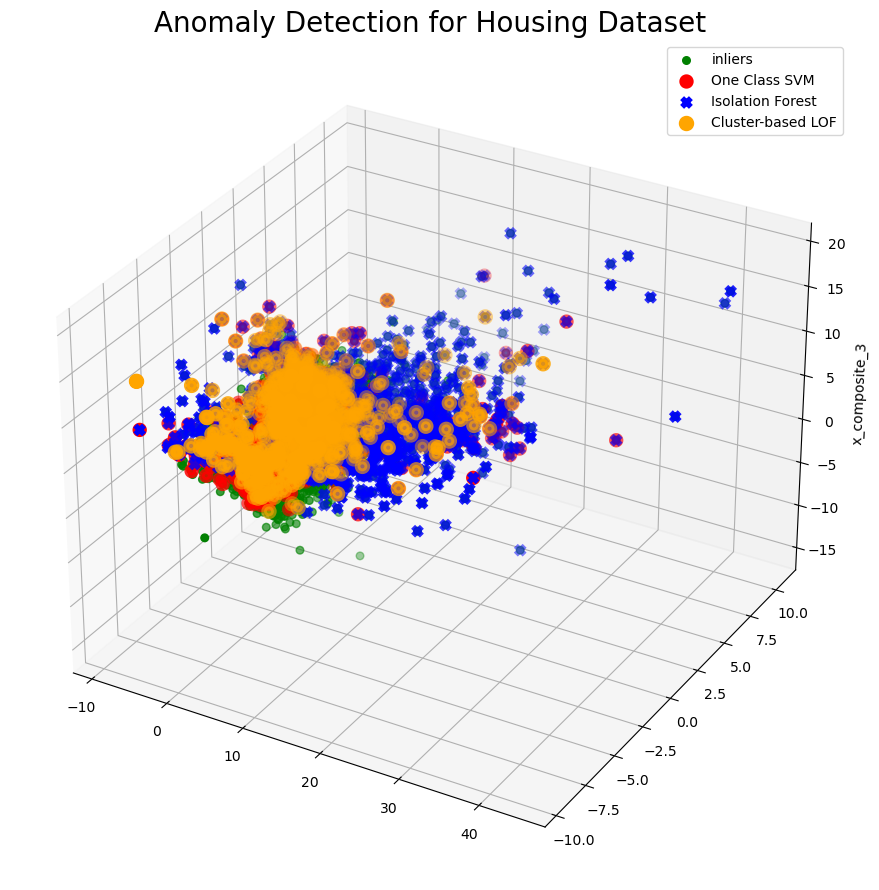

In [16]:
classifier_dict = {"One-Class SVM": OneClassSVM(nu=0.05),
                   "Isolation Forest": IsolationForest(contamination=0.05),
                   "Cluster-based LOF": LocalOutlierFactor(contamination=0.05)}
Outliers = TDC
for i, (clf_name, clf) in enumerate(classifier_dict.items()):
    clf.fit(X)
    X["anomaly"] = clf.fit_predict(X)
    outliers_subset = X[X.anomaly == -1]
    outliers_subset = outliers_subset.assign(model = clf_name)
    Outliers = pd.concat([Outliers, outliers_subset], axis=0, ignore_index=False)

pca = PCA(n_components=3) # reduce to k=3 dimensions
scaler = StandardScaler()
XT = scaler.fit_transform(X)
X_reduce = pca.fit_transform(XT)
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection="3d")
ax.set_zlabel("x_composite_3")
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=30, lw=1, label="inliers",c="green")
ax.scatter(X_reduce[Outliers[Outliers['model']=='One-Class SVM'].index, 0],
           X_reduce[Outliers[Outliers['model']=='One-Class SVM'].index, 1],
           X_reduce[Outliers[Outliers['model']=='One-Class SVM'].index, 2],
           lw=4, s=40, c="red", label="One Class SVM")
ax.scatter(X_reduce[Outliers[Outliers['model']=='Isolation Forest'].index, 0],
           X_reduce[Outliers[Outliers['model']=='Isolation Forest'].index, 1],
           X_reduce[Outliers[Outliers['model']=='Isolation Forest'].index, 2],
           lw=4, s=40, marker='x', c="blue", label="Isolation Forest")
ax.scatter(X_reduce[Outliers[Outliers['model']=='Cluster-based LOF'].index, 0],
           X_reduce[Outliers[Outliers['model']=='Cluster-based LOF'].index, 1],
           X_reduce[Outliers[Outliers['model']=='Cluster-based LOF'].index, 2],
           lw=4, s=50, c="orange", label="Cluster-based LOF")
plt.title("Anomaly Detection for Housing Dataset", fontsize=20)
plt.legend()
plt.tight_layout()

### Model Performance Before Outlier Detection

In [17]:
import dask
import dask.dataframe as dd
from sklearn.utils import parallel_backend
from dask.distributed import Client


client = Client()

scoring = {
    'precision': 'precision',
    'roc_auc': 'roc_auc',
    'F1': 'f1'
}

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

lr_model = LogisticRegression(max_iter=50000)
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = GradientBoostingClassifier(n_estimators = 50)
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

Mean Fit Time  Mean F1 Score  Mean Precision  \
Logistic Regression                    0.58           0.24            0.60   
Gradient Boosting Classifier          29.73           0.31            0.71   

                              Mean ROC AUC  
Logistic Regression                   0.67  
Gradient Boosting Classifier          0.73

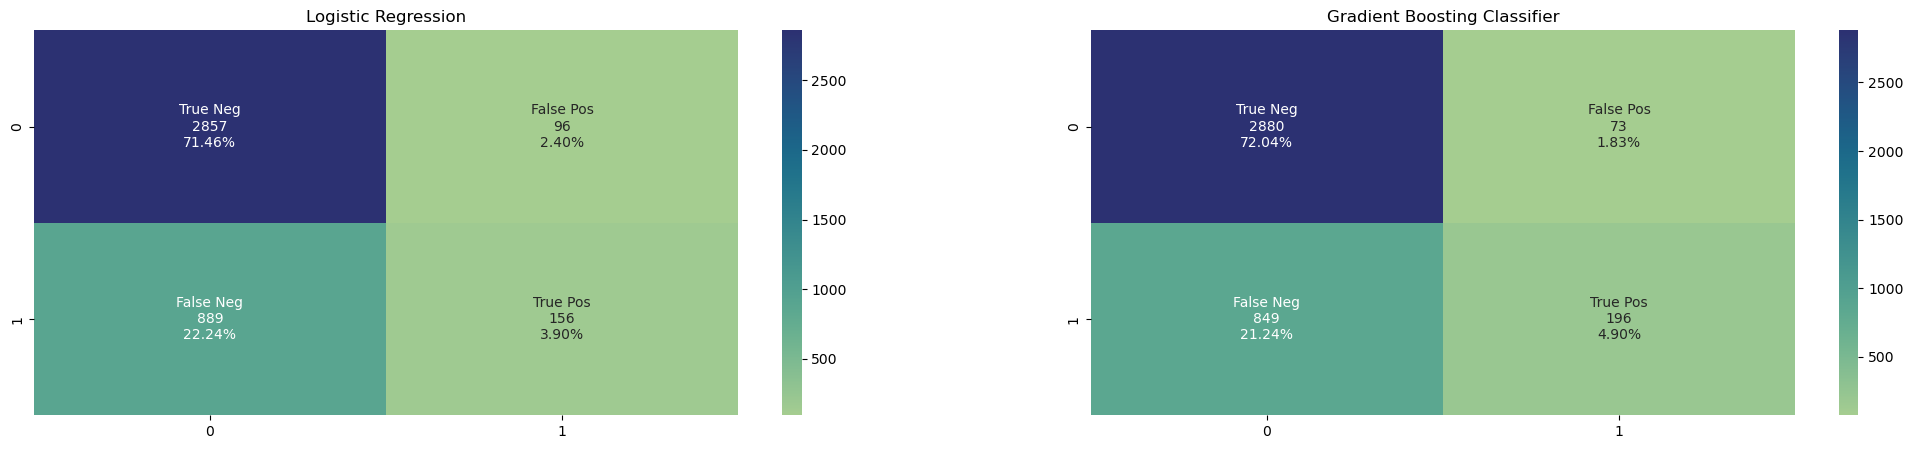

In [18]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

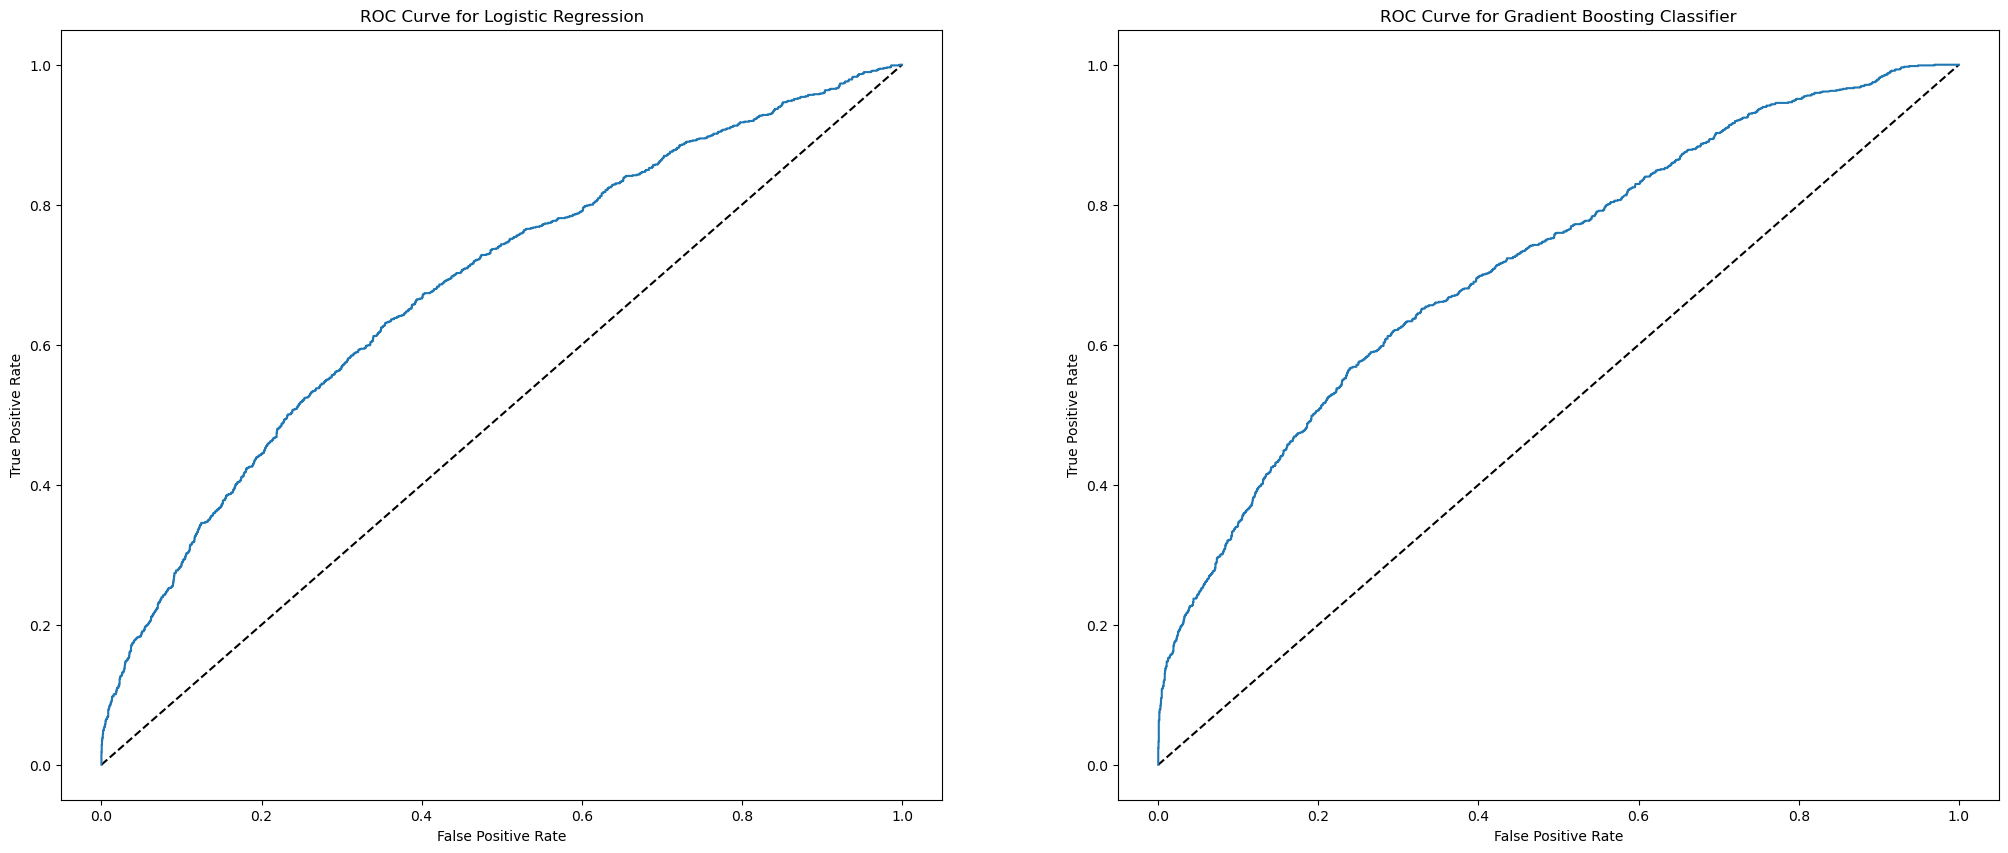

In [19]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

### Model Performance After Outlier Detection (Isolation Forest)

In [20]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [21]:
X_train.shape,y_train.shape

((15992, 52), (15992,))

In [22]:
iso = IsolationForest(contamination=0.05)
X_out = iso.fit_predict(X_train)
mask = (X_out != -1)
X_train, y_train = X_train[mask], y_train[mask]

In [23]:
X_train.shape,y_train.shape

((15192, 52), (15192,))

In [24]:
lr_model = LogisticRegression(max_iter=50000)
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = GradientBoostingClassifier(n_estimators = 50)
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

Mean Fit Time  Mean F1 Score  Mean Precision  \
Logistic Regression                    0.23           0.18            0.59   
Gradient Boosting Classifier          18.66           0.22            0.66   

                              Mean ROC AUC  
Logistic Regression                   0.65  
Gradient Boosting Classifier          0.70

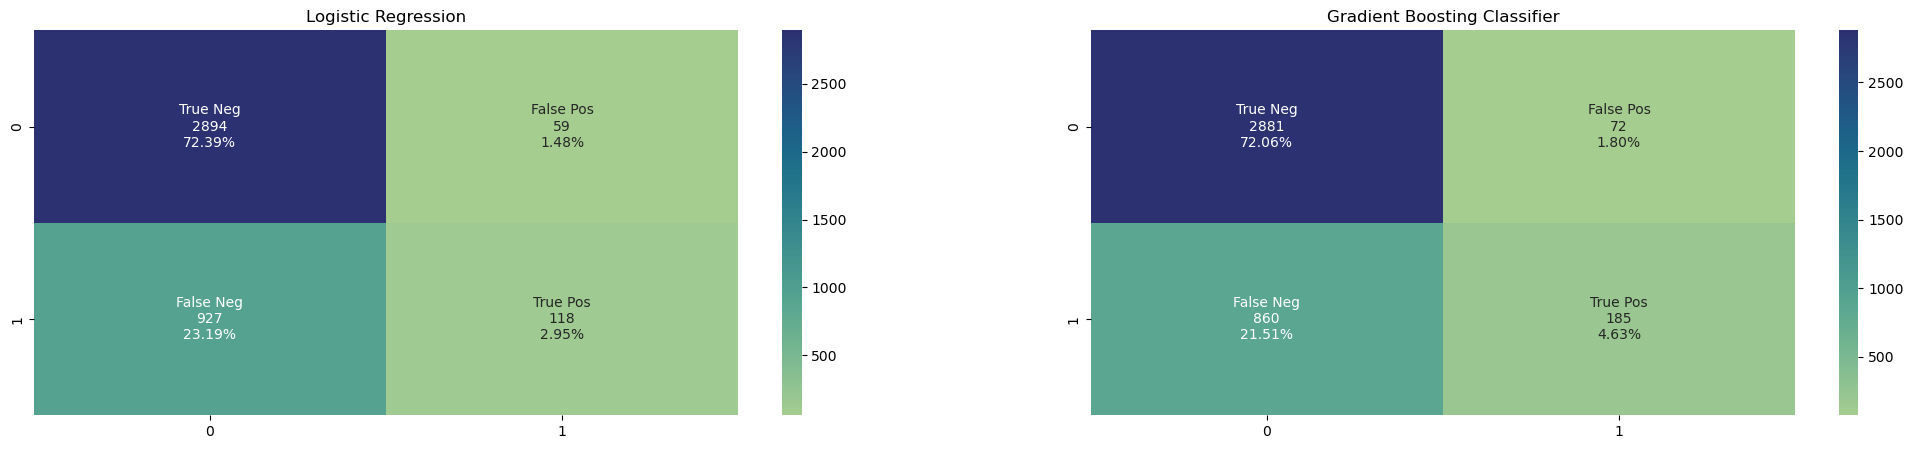

In [25]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

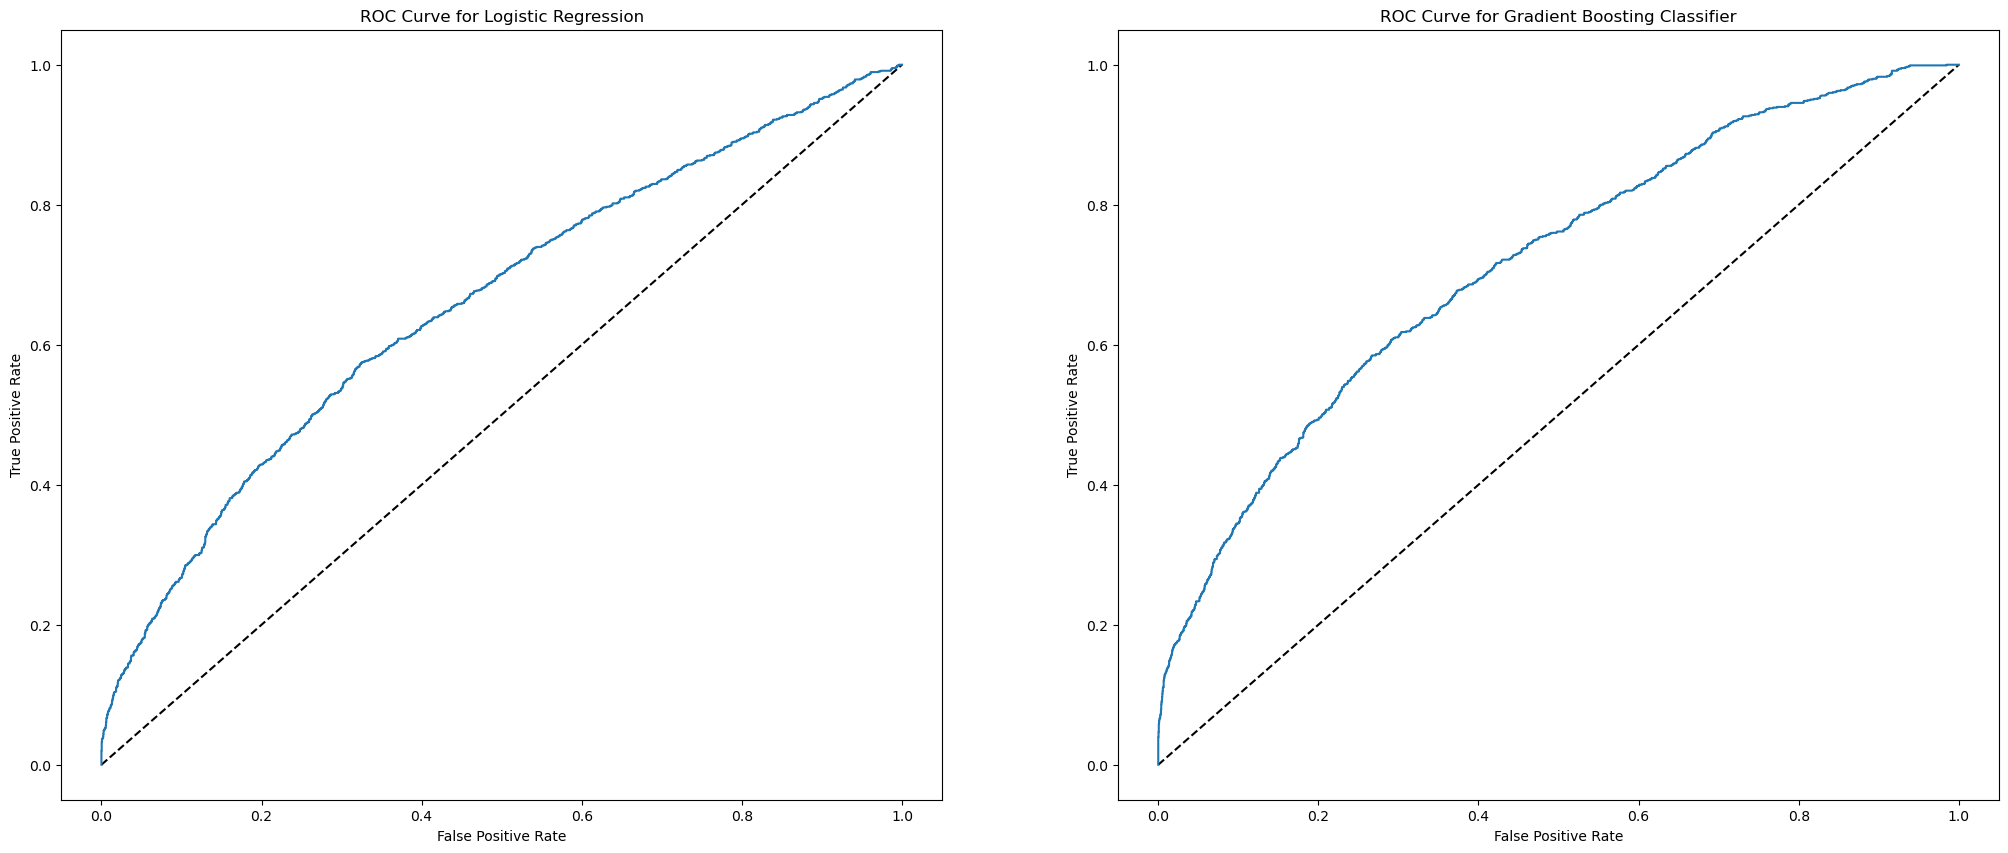

In [26]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

### Model Performance After Outlier Detection (Local Outlier Factor)

In [27]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [28]:
X_train.shape,y_train.shape

((15992, 52), (15992,))

In [29]:
lof = LocalOutlierFactor(contamination=0.05)
X_out = lof.fit_predict(X_train)
mask = (X_out != -1)
X_train, y_train = X_train[mask], y_train[mask]

In [30]:
X_train.shape,y_train.shape

((15192, 52), (15192,))

In [31]:
lr_model = LogisticRegression(max_iter=50000)
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = GradientBoostingClassifier(n_estimators = 50)
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

Mean Fit Time  Mean F1 Score  Mean Precision  \
Logistic Regression                    0.19           0.22            0.59   
Gradient Boosting Classifier          17.52           0.30            0.71   

                              Mean ROC AUC  
Logistic Regression                   0.66  
Gradient Boosting Classifier          0.73

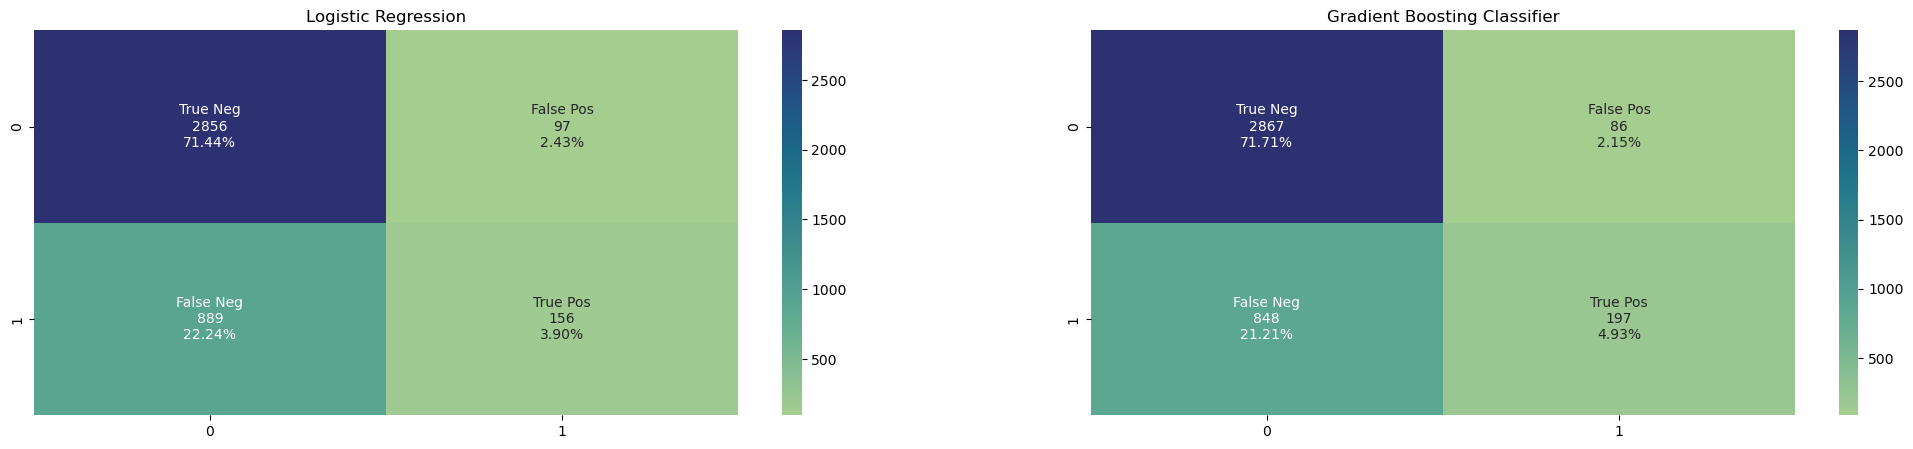

In [32]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

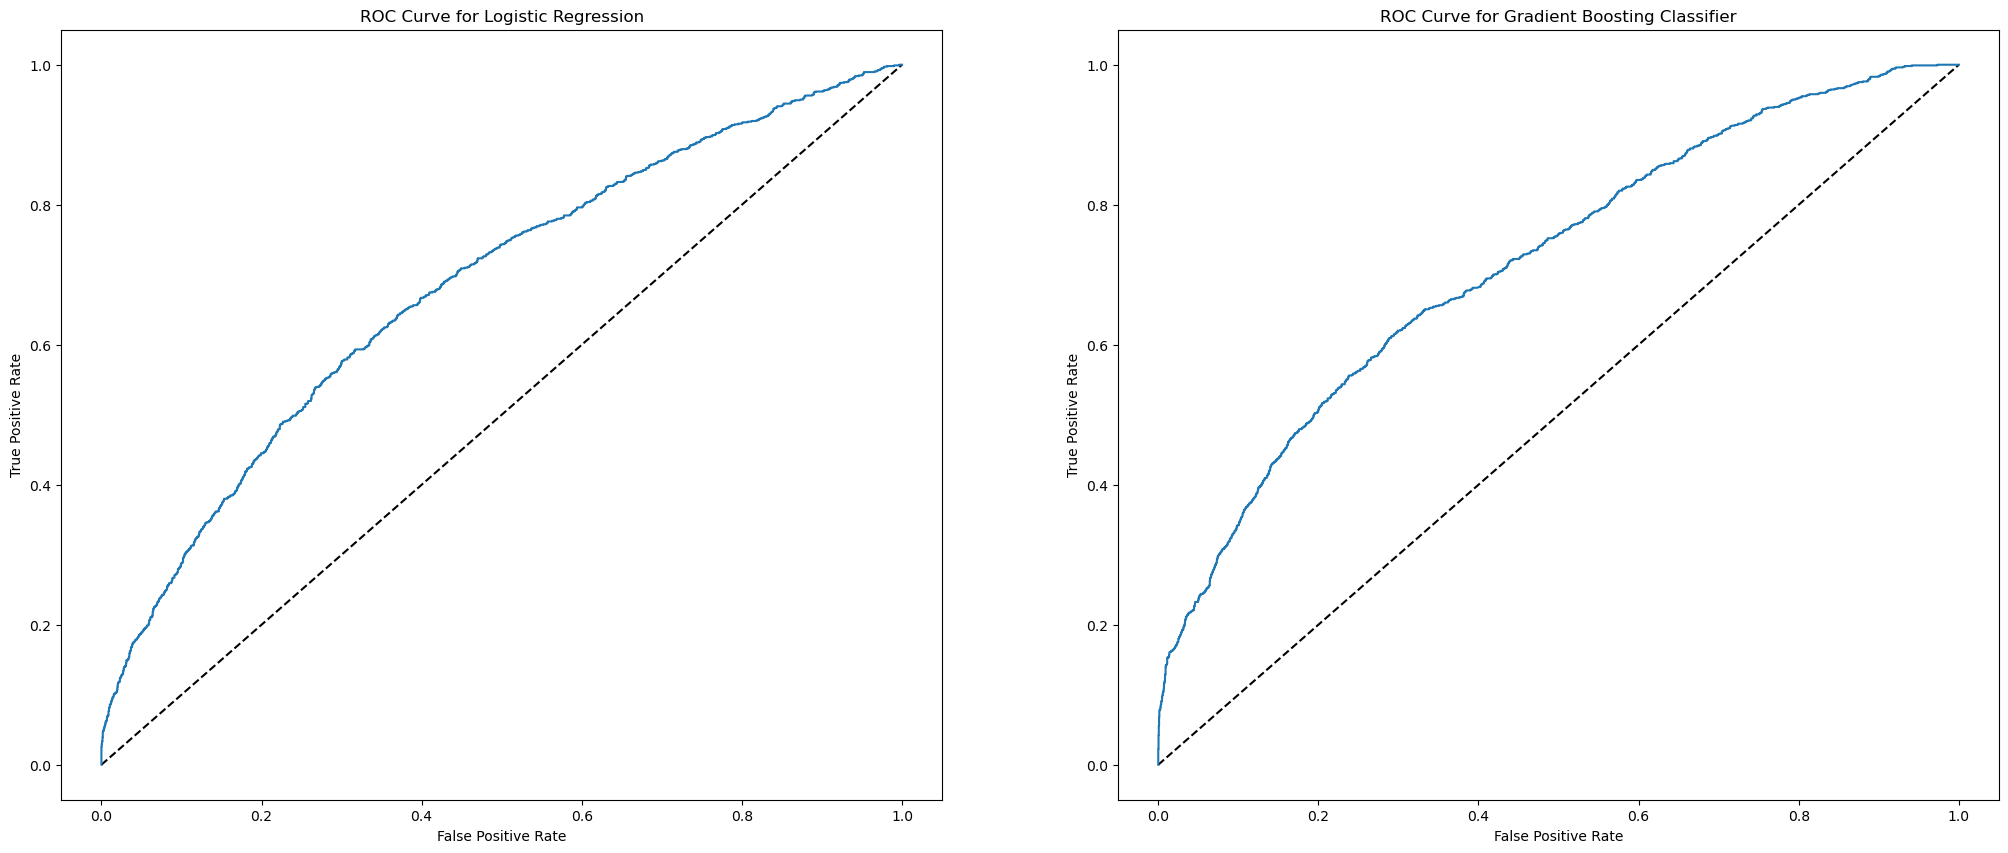

In [33]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

### Model Performance After Outlier Detection (One-Class SVM)

In [34]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [35]:
X_train.shape,y_train.shape

((15992, 52), (15992,))

In [36]:
svm = OneClassSVM(nu=0.05)
X_out = svm.fit_predict(X_train)
mask = (X_out != -1)
X_train, y_train = X_train[mask], y_train[mask]

In [37]:
X_train.shape,y_train.shape

((15191, 52), (15191,))

In [38]:
lr_model = LogisticRegression(max_iter=50000)
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = GradientBoostingClassifier(n_estimators = 50)
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

Mean Fit Time  Mean F1 Score  Mean Precision  \
Logistic Regression                    0.28           0.22            0.60   
Gradient Boosting Classifier          21.37           0.29            0.71   

                              Mean ROC AUC  
Logistic Regression                   0.66  
Gradient Boosting Classifier          0.72

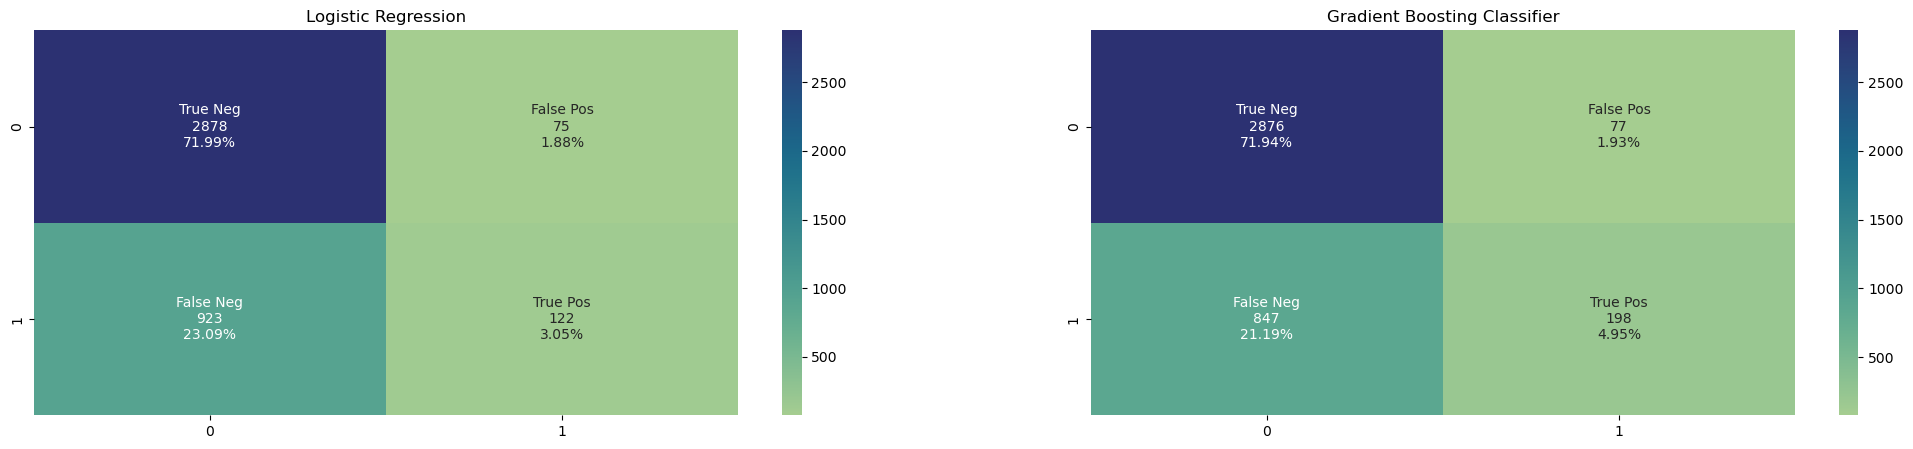

In [39]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

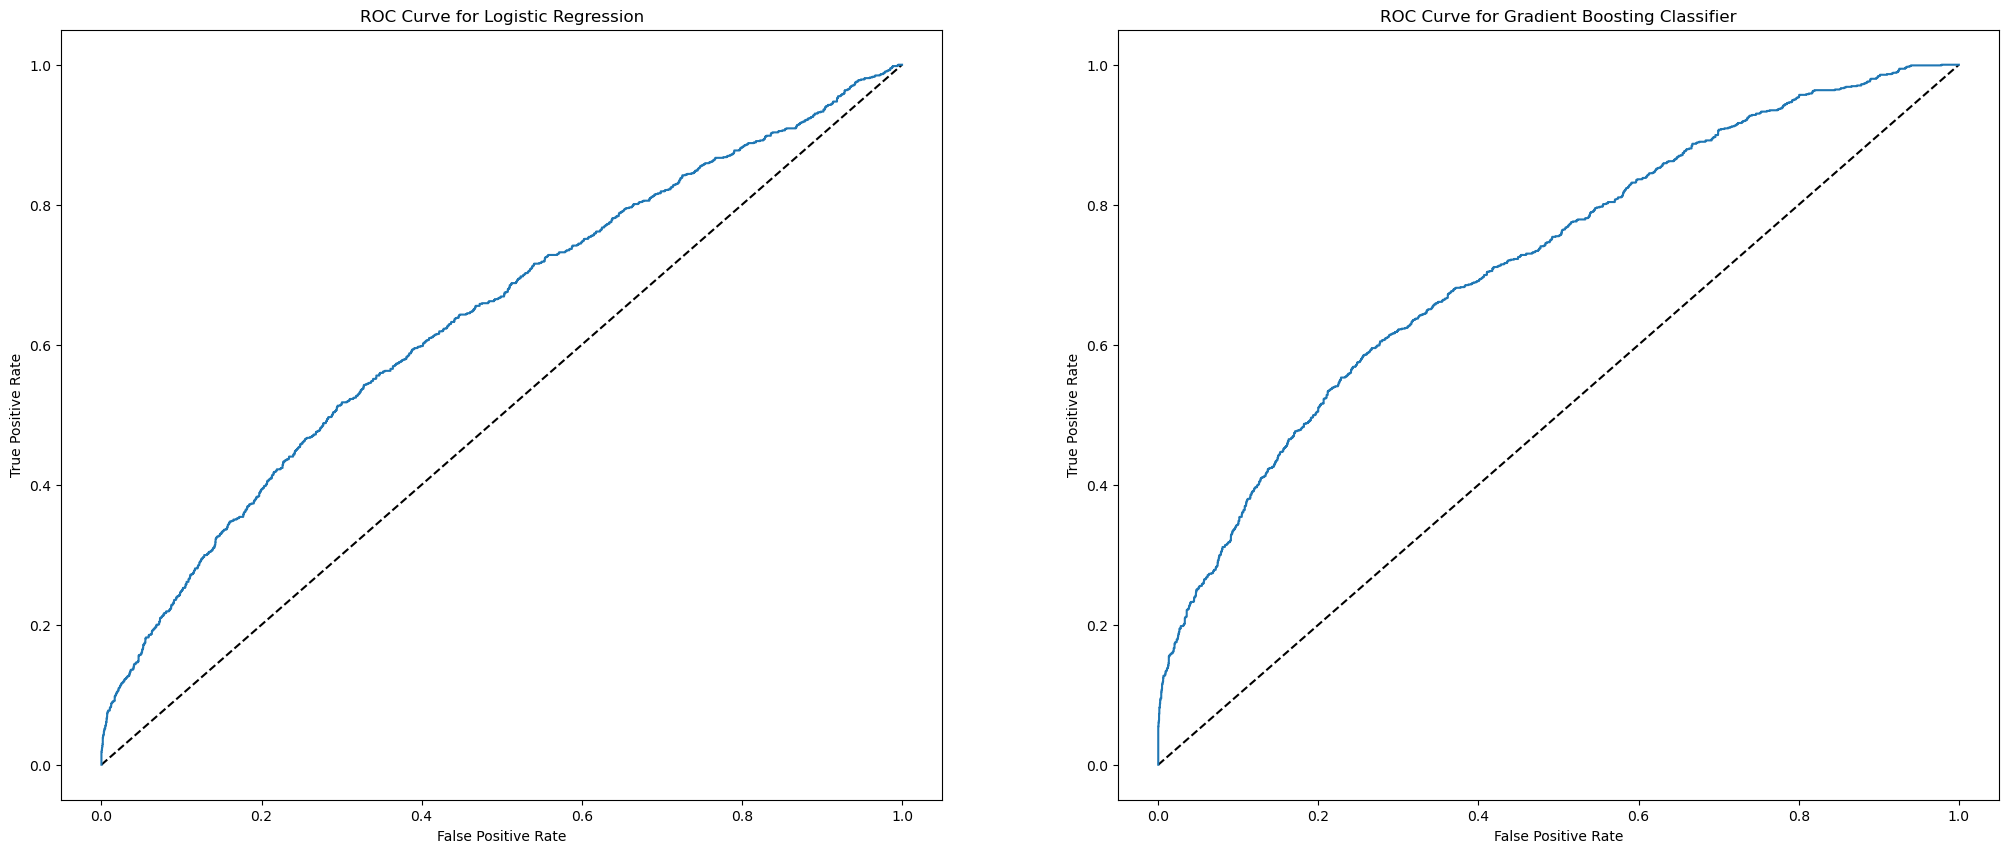

In [40]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

### Model Performance After Outlier Detection (Minimum Covariance Determinant)

In [41]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [42]:
X_train.shape,y_train.shape

((15992, 52), (15992,))

In [43]:
ee = EllipticEnvelope(contamination=0.05)
X_out = ee.fit_predict(X_train)
mask = (X_out != -1)
X_train, y_train = X_train[mask], y_train[mask]

In [44]:
X_train.shape,y_train.shape

((15192, 52), (15192,))

In [45]:
lr_model = LogisticRegression(max_iter=50000)
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = GradientBoostingClassifier(n_estimators = 50)
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

Mean Fit Time  Mean F1 Score  Mean Precision  \
Logistic Regression                    0.19           0.24            0.60   
Gradient Boosting Classifier          15.63           0.30            0.71   

                              Mean ROC AUC  
Logistic Regression                   0.66  
Gradient Boosting Classifier          0.73

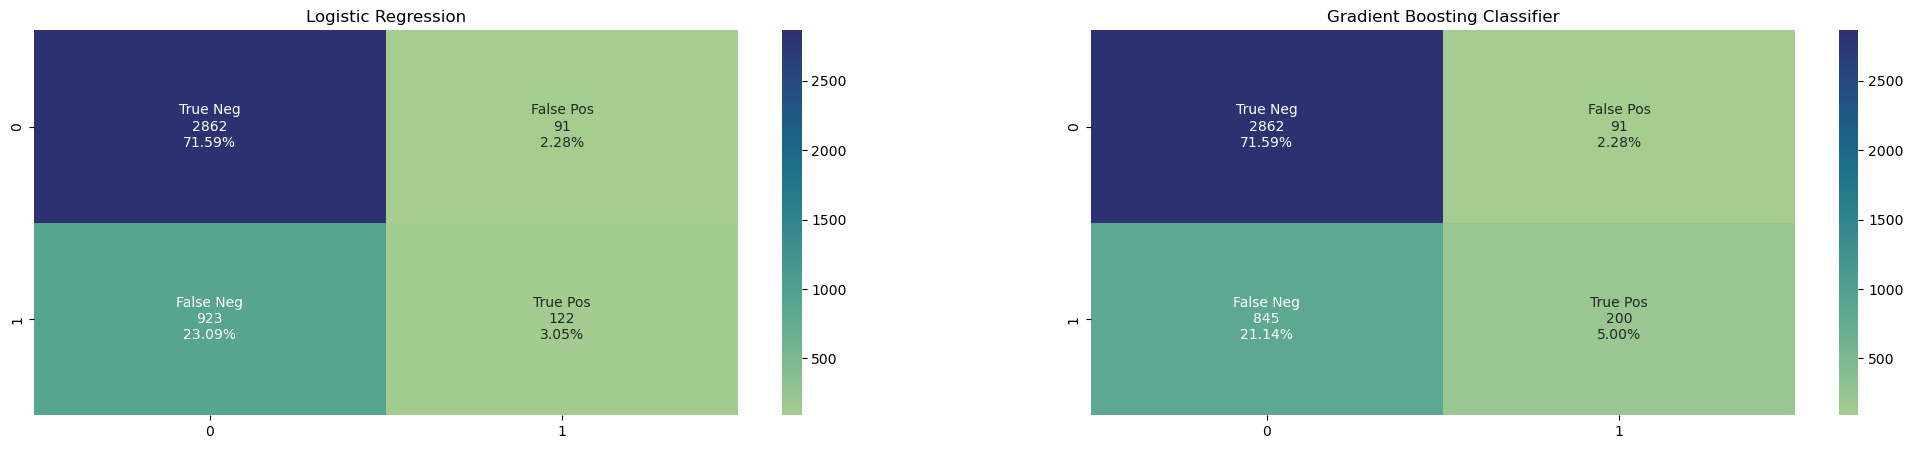

In [46]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

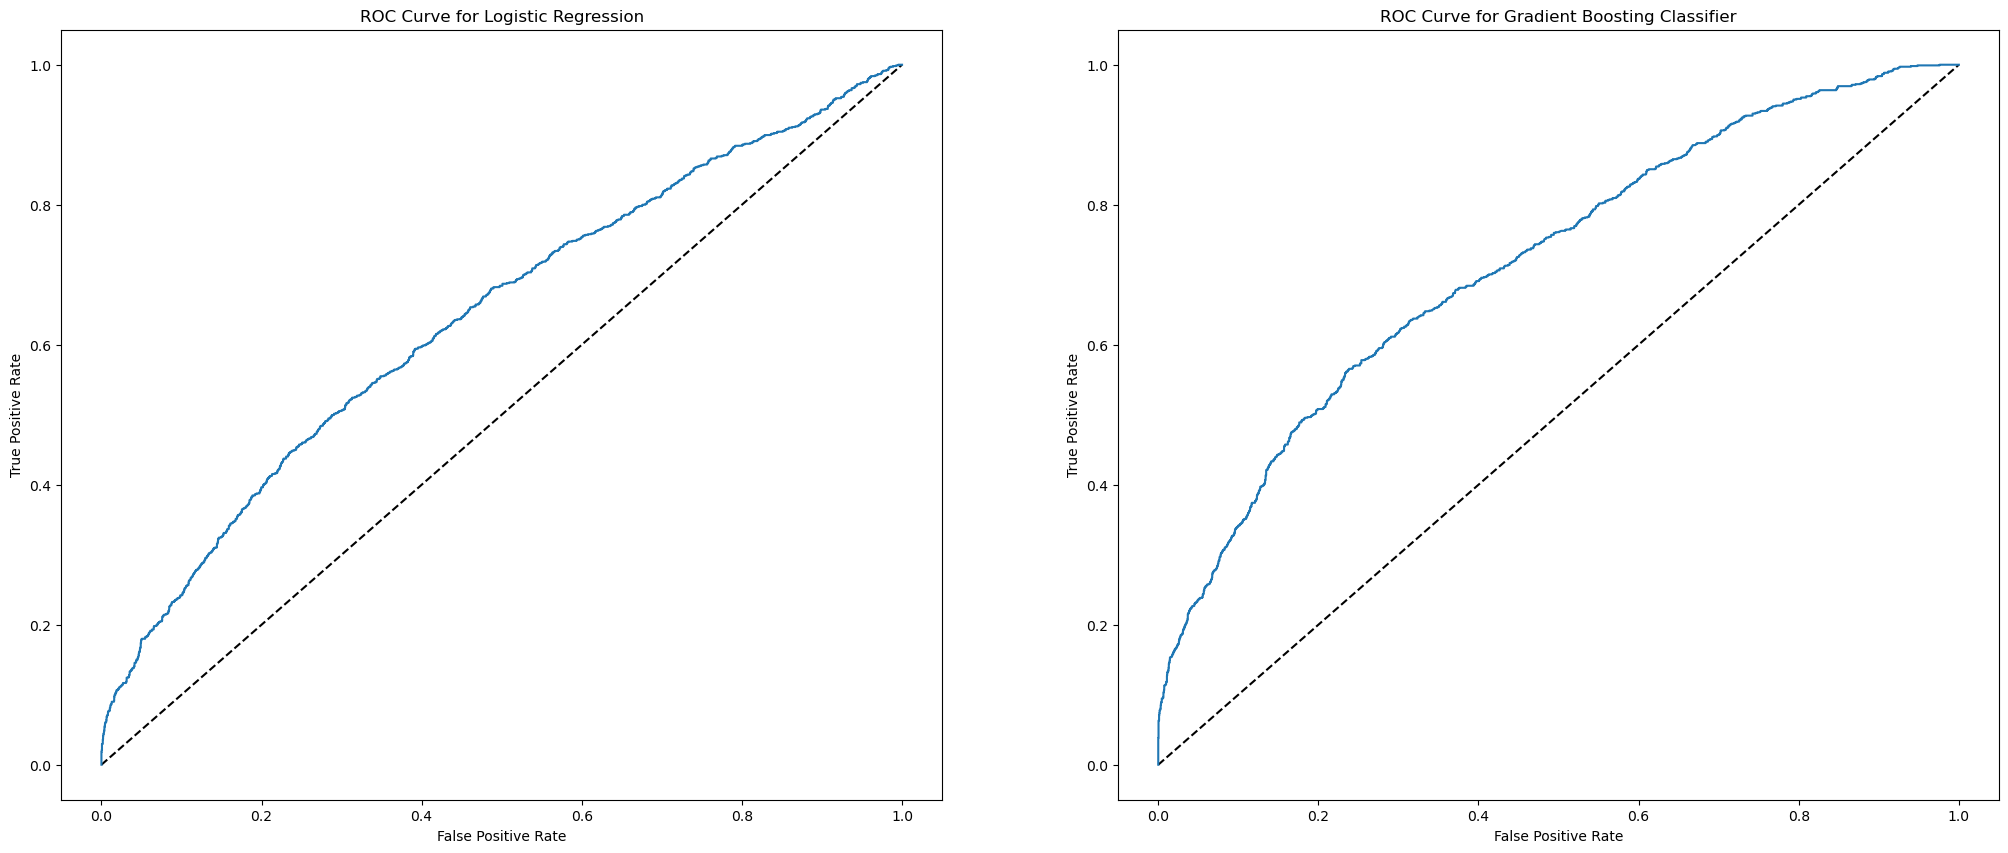

In [47]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

### Model Performance After Outlier Detection (Robust Covariance Detection)

In [48]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [49]:
X_train.shape,y_train.shape

((15992, 52), (15992,))

In [50]:
rc = EllipticEnvelope(support_fraction=0.994,contamination=0.05)
X_out = rc.fit_predict(X_train)
mask = (X_out != -1)
X_train, y_train = X_train[mask], y_train[mask]

In [51]:
X_train.shape,y_train.shape

((15192, 52), (15192,))

In [52]:
lr_model = LogisticRegression(max_iter=50000)
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = GradientBoostingClassifier(n_estimators = 50)
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

Mean Fit Time  Mean F1 Score  Mean Precision  \
Logistic Regression                    0.23           0.20            0.59   
Gradient Boosting Classifier          21.61           0.25            0.67   

                              Mean ROC AUC  
Logistic Regression                   0.66  
Gradient Boosting Classifier          0.71

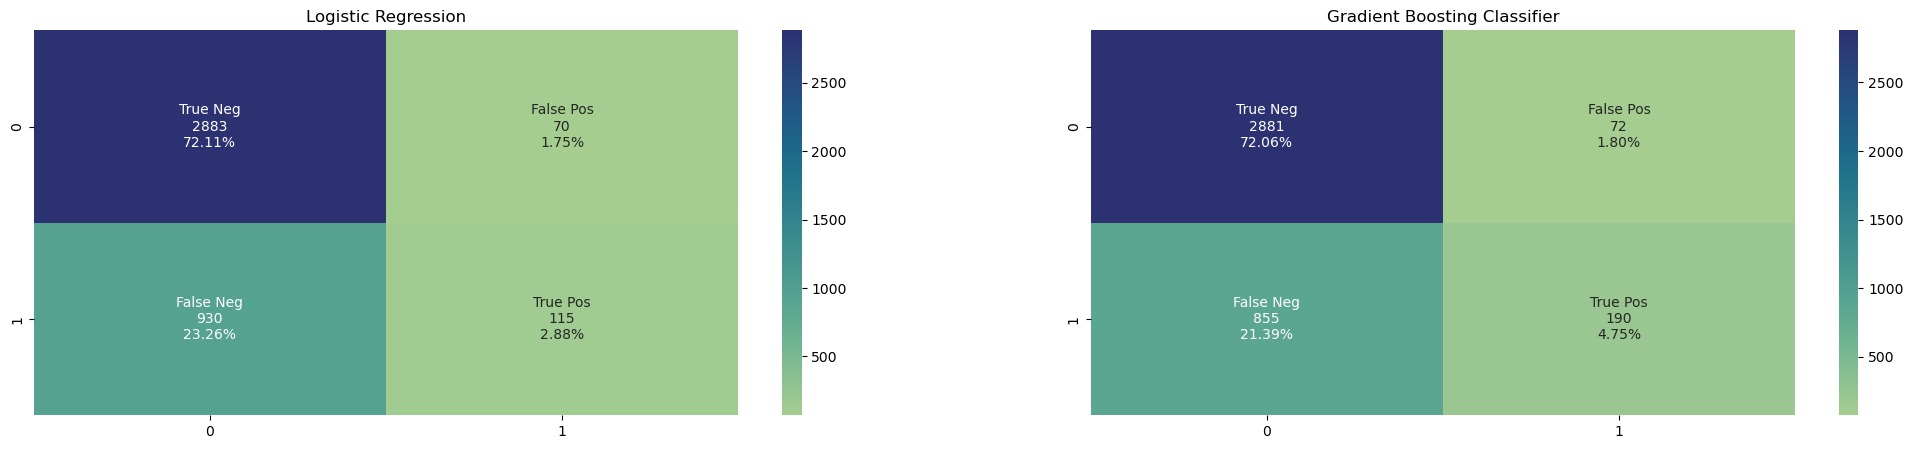

In [53]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

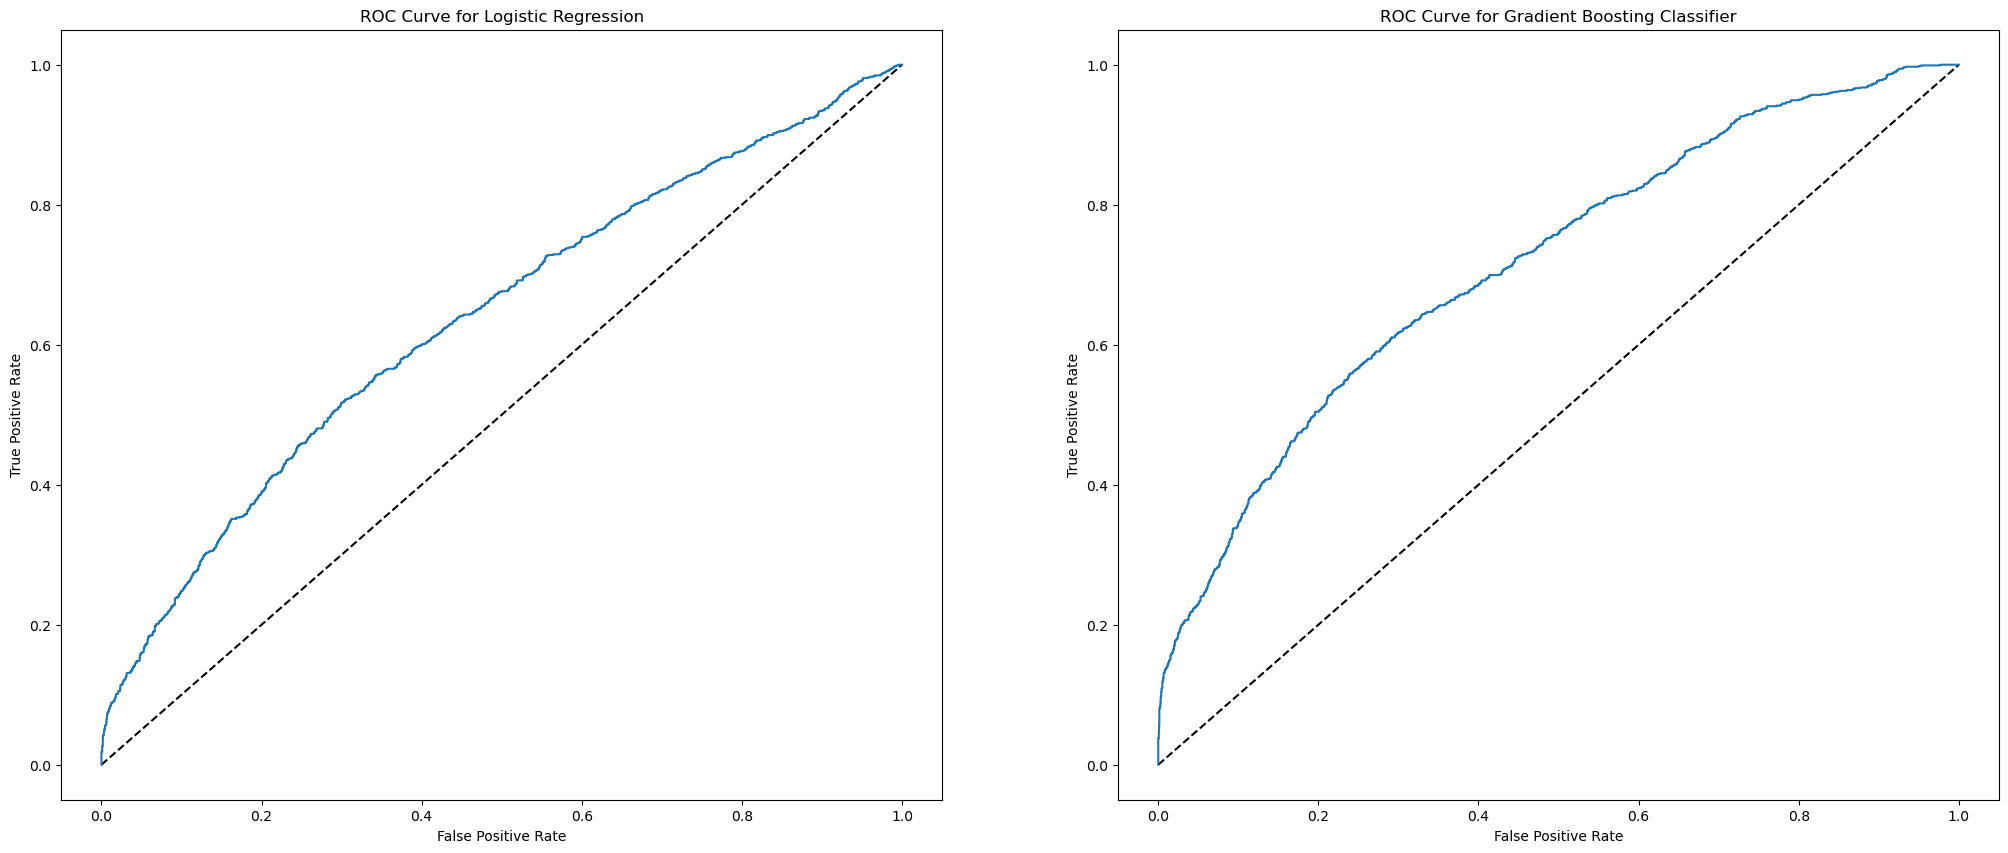

In [54]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

### RESULTS

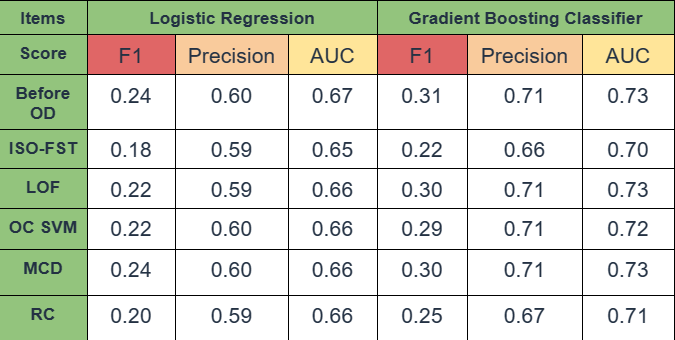